# 1- CNN - Binary Classification - TF

- [Pizza vs Steak](https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip)

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [1]:
import tensorflow as tf
tf.__version__

'2.4.1'

In [2]:
# Checking GPU connection
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
# import subprocess
# print(subprocess.check_output(["nvidia-smi"]).decode())

## Extracting data

In [4]:
import zipfile

extractor= zipfile.ZipFile("../DATA/Computer_Vision/pizza_steak.zip")
extractor.extractall("../DATA/Computer_Vision")
extractor.close()

## Checking the directory and the contents

In [5]:
from helper import traverse_dataset, get_class_names, view_random_image

In [6]:
# Reloading the module
# import importlib as imp
# import helper
# imp.reload(helper)

In [7]:
data_path= "../DATA/Computer_Vision/pizza_steak/train"
traverse_dataset(data_path)

 There are 1 files in 2 direcotory under ../DATA/Computer_Vision/pizza_steak/train
 There are 750 files in 0 direcotory under ../DATA/Computer_Vision/pizza_steak/train\pizza
 There are 750 files in 0 direcotory under ../DATA/Computer_Vision/pizza_steak/train\steak


In [8]:
classes= get_class_names(data_path)
classes

array(['pizza', 'steak'], dtype='<U9')

In [9]:
# classes= classes[classes != ".DS_Store"]
# classes

## Viewing the image

shape -- (512, 512, 3)
shape -- (512, 508, 3)


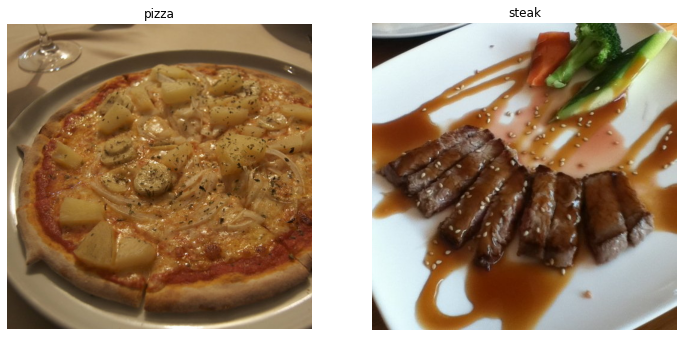

In [10]:
# import random
# random.choice(classes)

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
pizza_img= view_random_image(data_path, "pizza")
plt.subplot(1,2,2)
steak_img= view_random_image(data_path, "steak")

## Building an ANN : Model-1

In [ ]:
# Preprocessig with ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
tf.random.set_seed(42)

# Training and testing directory
train_dir= "../DATA/Computer_Vision/pizza_steak/train"
test_dir= "../DATA/Computer_Vision/pizza_steak/test"

# Creating ImageDataAugmented object with necessary transformations
train_img_gen= ImageDataGenerator(rescale=1/255.)
test_img_gen= ImageDataGenerator(rescale=1/255.)

# Creating training and testing data in batches
train_data= train_img_gen.flow_from_directory(train_dir, 
                                              target_size=(224,224), color_mode="rgb",
                                              class_mode="binary", batch_size=32, shuffle=True
                                             )

test_data= test_img_gen.flow_from_directory(test_dir, 
                                            target_size=(224,224), color_mode="rgb",
                                            class_mode="binary", batch_size=32, shuffle=True
                                           )

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [15]:
import tensorflow as tf
from tensorflow import keras

In [18]:
tf.random.set_seed(42)

model_1= keras.Sequential([
            keras.layers.Flatten(input_shape=(224,224,3)),
            keras.layers.Dense(64, activation="relu"),
            keras.layers.Dense(128, activation="relu"),
            keras.layers.Dense(128, activation="relu"),
            keras.layers.Dense(1, activation="sigmoid")
        ], name="model-1")

model_1.compile(loss="binary_crossentropy", optimizer="adam",metrics=["accuracy"])

hist_1= model_1.fit(train_data, 
                    epochs=20, steps_per_epoch=len(train_data), 
                    validation_data=test_data, validation_steps=len(test_data))

Epoch 1/20
47/47 [==============================] - 18s 320ms/step - loss: 3.4941 - accuracy: 0.5412 - val_loss: 0.5494 - val_accuracy: 0.7380
Epoch 2/20
47/47 [==============================] - 5s 111ms/step - loss: 0.6194 - accuracy: 0.7216 - val_loss: 0.5175 - val_accuracy: 0.7560
Epoch 3/20
47/47 [==============================] - 5s 112ms/step - loss: 0.6903 - accuracy: 0.7180 - val_loss: 2.5629 - val_accuracy: 0.5280
Epoch 4/20
47/47 [==============================] - 5s 113ms/step - loss: 1.1086 - accuracy: 0.6652 - val_loss: 0.4858 - val_accuracy: 0.7560
Epoch 5/20
47/47 [==============================] - 5s 111ms/step - loss: 0.4896 - accuracy: 0.7615 - val_loss: 0.5006 - val_accuracy: 0.7600
Epoch 6/20
47/47 [==============================] - 5s 114ms/step - loss: 0.4542 - accuracy: 0.8017 - val_loss: 0.4931 - val_accuracy: 0.7480
Epoch 7/20
47/47 [==============================] - 5s 112ms/step - loss: 0.4213 - accuracy: 0.8189 - val_loss: 0.5575 - val_accuracy: 0.7460
Epoch

In [75]:

## Method 4
def plot_curves(hist) :
    '''
    Plotting the loss and accuracy curves
    '''
    
    loss= hist.history["loss"]
    val_loss= hist.history["val_loss"]
    acc= hist.history["accuracy"]
    val_acc= hist.history["val_accuracy"]
    
    epochs= range(len(loss))
    
    plt.figure(figsize=(9,4))
    plt.subplot(1,2,1)
    plt.plot(epochs, loss, label="loss")
    plt.plot(epochs, val_loss, label="val-loss")
    plt.title("Loss over epochs")
    plt.xlabel("Epochs")
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.plot(epochs, acc, label="Accuracy")
    plt.plot(epochs, val_acc, label="val-accuracy")
    plt.title("Accuracy over epochs")
    plt.xlabel("Epochs")
    plt.legend()
    
    plt.tight_layout()

def load_prep_image(file, shape=224):
    '''
    Reads an image file and loads with scaling
    '''
    
    img= tf.io.read_file(file)
    
    img_tensor= tf.image.decode_image(img, channels=3),
    
    img_resized= tf.image.resize(img_tensor, size=(shape, shape))
    
    img_resized /= 255.
    
    return img_resized

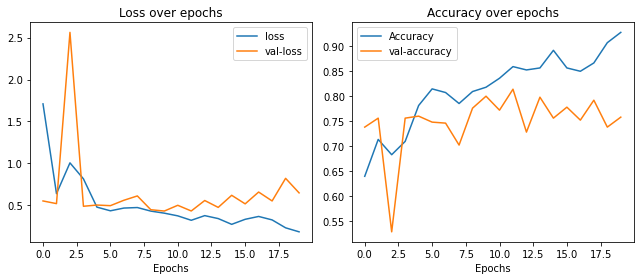

In [37]:
plot_curves(hist_1)

In [33]:
model_1.summary() # Huge parameters, but still overfitting

Model: "model-1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 150528)            0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                9633856   
_________________________________________________________________
dense_11 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_12 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 129       
Total params: 9,658,817
Trainable params: 9,658,817
Non-trainable params: 0
_________________________________________________________________


## CNN - Model 2 : Tiny VGG

In [41]:
model_2= keras.Sequential([
            keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu", padding="valid", input_shape=(224,224,3)),
            keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu", padding="valid"),
            keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    
            keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu", padding="valid"),
            keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu", padding="valid"),
            keras.layers.MaxPool2D(pool_size=2, padding="valid"),
            
            keras.layers.Flatten(),
            keras.layers.Dense(1, activation="sigmoid")
            
        ], name="model_2")

model_2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

hist_2= model_2.fit(train_data, 
                    epochs=5, steps_per_epoch=len(train_data),
                    validation_data=test_data, validation_steps=len(test_data)
                   )

Epoch 1/5
47/47 [==============================] - 21s 415ms/step - loss: 0.6219 - accuracy: 0.6357 - val_loss: 0.4799 - val_accuracy: 0.7820
Epoch 2/5
47/47 [==============================] - 19s 402ms/step - loss: 0.4679 - accuracy: 0.7935 - val_loss: 0.4128 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 19s 403ms/step - loss: 0.4099 - accuracy: 0.8196 - val_loss: 0.3391 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 19s 401ms/step - loss: 0.3381 - accuracy: 0.8581 - val_loss: 0.3659 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 19s 400ms/step - loss: 0.3118 - accuracy: 0.8605 - val_loss: 0.3540 - val_accuracy: 0.8540


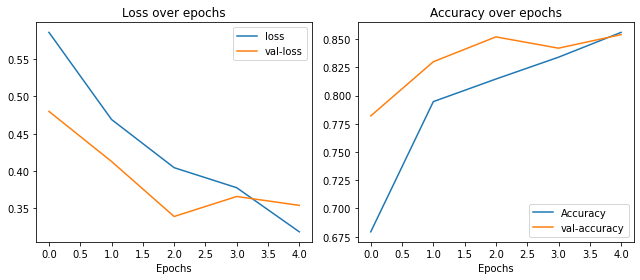

In [43]:
plot_curves(hist_2) 

## Model 3 : Simpler model

In [45]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

In [46]:
model_3= keras.Sequential([
            Conv2D(filters=16, kernel_size=3, activation="relu", input_shape=(224,224,3)),
            MaxPool2D(pool_size=2, strides=1, padding="valid"),
            
            Conv2D(filters=16, kernel_size=3, activation="relu", input_shape=(224,224,3)),
            MaxPool2D(pool_size=2, strides=1, padding="valid"),
            Dropout(0.2),
    
            Conv2D(filters=16, kernel_size=3, activation="relu", input_shape=(224,224,3)),
            MaxPool2D(pool_size=2, strides=1, padding="valid"),
            
            Flatten(),
            Dense(1, activation="sigmoid")
            ], name="model-3")

model_3.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

hist_3= model_3.fit(train_data,
           epochs=10, steps_per_epoch=len(train_data),
           validation_data=test_data, validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 52s 951ms/step - loss: 9.2142 - accuracy: 0.4826 - val_loss: 0.6789 - val_accuracy: 0.6500
Epoch 2/10
47/47 [==============================] - 37s 779ms/step - loss: 0.5498 - accuracy: 0.7358 - val_loss: 0.6900 - val_accuracy: 0.5860
Epoch 3/10
47/47 [==============================] - 37s 781ms/step - loss: 0.4851 - accuracy: 0.7732 - val_loss: 0.6845 - val_accuracy: 0.6500
Epoch 4/10
47/47 [==============================] - 37s 779ms/step - loss: 0.4588 - accuracy: 0.7916 - val_loss: 0.5764 - val_accuracy: 0.7640
Epoch 5/10
47/47 [==============================] - 37s 778ms/step - loss: 0.4461 - accuracy: 0.8023 - val_loss: 0.6455 - val_accuracy: 0.7180
Epoch 6/10
47/47 [==============================] - 37s 780ms/step - loss: 0.3509 - accuracy: 0.8546 - val_loss: 0.5064 - val_accuracy: 0.7680
Epoch 7/10
47/47 [==============================] - 37s 780ms/step - loss: 0.2920 - accuracy: 0.8782 - val_loss: 0.4413 - val_accuracy: 0.8160

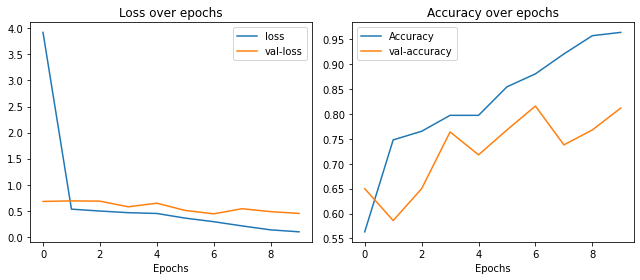

In [47]:
plot_curves(hist_3)

## Now with Data Augmentation - model -4

In [48]:
train_img_gen_aug= ImageDataGenerator(rescale=1/255.,
                                     zoom_range=0.2, shear_range=0.2,
                                     rotation_range=20,
                                     width_shift_range=0.2, height_shift_range=0.2,
                                     horizontal_flip=True, 
                                     vertical_flip=True)

test_img_gen_2= ImageDataGenerator(rescale=1/255.) # we could hvae used the old test_img_gen

In [52]:
train_data_aug= train_img_gen_aug.flow_from_directory(train_dir,
                                                     target_size=(224,224), batch_size=32,
                                                     class_mode="binary", seed=42, shuffle=True)

test_data_2= test_img_gen_2.flow_from_directory(test_dir, target_size=(224,224), batch_size=32,
                                               class_mode="binary", shuffle=True)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [54]:
# Checking the data augmentation
imgs, labels= train_data_aug.next()
imgs.shape, labels.shape

((32, 224, 224, 3), (32,))

[]

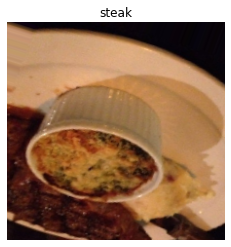

In [66]:
import random

num= random.randint(0,32)
plt.imshow(imgs[num])
plt.title(classes[tf.cast(labels[num], "int8")])
plt.axis(False)
plt.plot()

In [67]:
# Training with Model 3 : now with Augmented data

model_4= keras.models.clone_model(model_3)

model_4.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

hist_4= model_4.fit(train_data_aug,
           epochs=10, steps_per_epoch=len(train_data_aug),
           validation_data=test_data_2, validation_steps=len(test_data_2))

Epoch 1/10
47/47 [==============================] - 53s 1s/step - loss: 3.9698 - accuracy: 0.5369 - val_loss: 0.5911 - val_accuracy: 0.7100
Epoch 2/10
47/47 [==============================] - 51s 1s/step - loss: 0.5788 - accuracy: 0.7210 - val_loss: 0.5459 - val_accuracy: 0.7120
Epoch 3/10
47/47 [==============================] - 50s 1s/step - loss: 0.5992 - accuracy: 0.6830 - val_loss: 0.5658 - val_accuracy: 0.7940
Epoch 4/10
47/47 [==============================] - 49s 1s/step - loss: 0.5185 - accuracy: 0.7582 - val_loss: 0.4718 - val_accuracy: 0.7800
Epoch 5/10
47/47 [==============================] - 46s 961ms/step - loss: 0.5309 - accuracy: 0.7447 - val_loss: 0.4798 - val_accuracy: 0.7960
Epoch 6/10
47/47 [==============================] - 47s 985ms/step - loss: 0.5121 - accuracy: 0.7681 - val_loss: 0.5888 - val_accuracy: 0.7580
Epoch 7/10
47/47 [==============================] - 46s 963ms/step - loss: 0.5522 - accuracy: 0.7348 - val_loss: 0.4464 - val_accuracy: 0.8260
Epoch 8/10


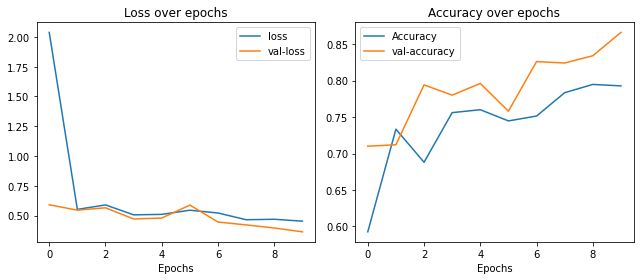

In [68]:
plot_curves(hist_4)

## Data Augmentation + Tiny VGG - Model 5

In [71]:
model_5= keras.models.clone_model(model_2)

model_5.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

hist_5= model_5.fit(train_data_aug, 
                    epochs=10, steps_per_epoch=len(train_data_aug),
                    validation_data=test_data_2, validation_steps=len(test_data_2)
                   )

Epoch 1/10
47/47 [==============================] - 21s 436ms/step - loss: 0.6357 - accuracy: 0.6081 - val_loss: 0.4591 - val_accuracy: 0.7700
Epoch 2/10
47/47 [==============================] - 20s 426ms/step - loss: 0.5163 - accuracy: 0.7463 - val_loss: 0.3750 - val_accuracy: 0.8380
Epoch 3/10
47/47 [==============================] - 20s 421ms/step - loss: 0.4994 - accuracy: 0.7481 - val_loss: 0.3600 - val_accuracy: 0.8480
Epoch 4/10
47/47 [==============================] - 20s 424ms/step - loss: 0.5020 - accuracy: 0.7594 - val_loss: 0.4017 - val_accuracy: 0.8040
Epoch 5/10
47/47 [==============================] - 20s 431ms/step - loss: 0.4819 - accuracy: 0.7851 - val_loss: 0.3400 - val_accuracy: 0.8420
Epoch 6/10
47/47 [==============================] - 20s 430ms/step - loss: 0.4589 - accuracy: 0.7968 - val_loss: 0.4074 - val_accuracy: 0.8040
Epoch 7/10
47/47 [==============================] - 20s 428ms/step - loss: 0.4872 - accuracy: 0.7696 - val_loss: 0.3234 - val_accuracy: 0.8720

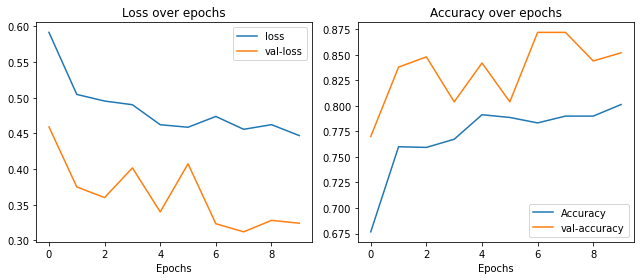

In [72]:
plot_curves(hist_5)

## Predicting with custom image

In [141]:
# Selecting Model 5

from tensorflow.keras.utils import plot_model
plot_model(model_5, show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [142]:
pred_img_1= load_prep_image("../DATA/Computer_Vision/03-steak.jpeg")
pred_img_1.shape

TensorShape([1, 224, 224, 3])

> Here it is in format of (batch-size, height, width, channel) Which is the correct format for our model
  
 If it's not in the shape, 
 ```py
 tf.expand_dims(img,axis=0)
 ```

In [144]:
val= tf.cast(tf.squeeze(model_5.predict(pred_img_1)).numpy() > 0.5 , dtype="int8").numpy()
classes[val]

'steak'

In [134]:
def pred_and_plot(model,  file, classes) :
    """
    Predicting and plotting for an image
    """
    img= load_prep_image(file)
    
    if img.ndim < 4:
        plt.imshow(img)
        img= tf.expand_dims(img, axis=0) 
    else:
        plt.imshow(tf.squeeze(img, axis=0))

    pred= model.predict(img)
    print("score--", pred)
    pred_Class= classes[tf.cast(tf.squeeze(pred).numpy() > 0.5 , dtype="int8").numpy()]
    
    
    plt.title(pred_Class, fontdict={"fontsize": 18, "color": "green"})
    plt.axis(False)

score-- [[0.9219714]]


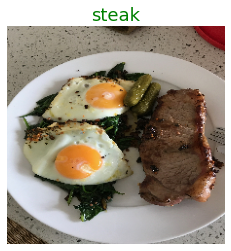

In [138]:
pred_and_plot(model_5, "../DATA/Computer_Vision/03-steak.jpeg", classes, )

score-- [[0.264203]]


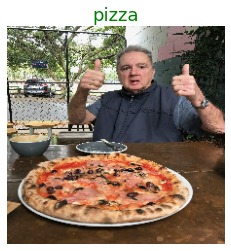

In [139]:
pred_and_plot(model_5, "../DATA/Computer_Vision/03-pizza-dad.jpeg", classes, )

score-- [[0.20723762]]


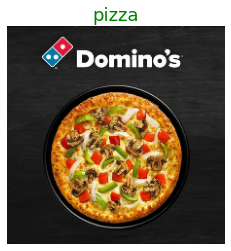

In [140]:
pred_and_plot(model_5, "../DATA/Computer_Vision/pizza-2.jfif", classes, )